# Задание 2.1(а)
x = 0,1976

In [64]:
import numpy as np
import random
x = np.arange(0.180, 0.210, 0.005)
# for i in range(len(x)):
#     x[i] -= random.randint(-100, 100) / 50000
y = np.array([5.61543, 5.46693, 5.32634, 5.19304, 5.06649, 4.94619])
print("x, y:", x, y)
X = 0.1976
dx = X-x
print("x-xi: ", dx)


x, y: [0.18  0.185 0.19  0.195 0.2   0.205] [5.61543 5.46693 5.32634 5.19304 5.06649 4.94619]
x-xi:  [ 0.0176  0.0126  0.0076  0.0026 -0.0024 -0.0074]


Вычисляем $$ \Pi_{n+1} = (x-x_{0})(x-x_{1})\dots(x-x_{n})$$

In [65]:
P = np.prod(dx)
P

7.782392217600032e-14

Вычисляем $$ D_{i} = (x_{i}-x_{0})(x_{i}-x_{1})\dots(x_{i}-x_{i-1})(x-x_{i})(x_{i}-x_{i+1})\dots(x_{i}-x_{n})$$

In [66]:
d_arr = []
for i in range(6):
    d_arr.append([])
    for j in range(6):
        if i == j: d_arr[i].append(X - x[i])
        else: d_arr[i].append(x[i] - x[j])
        
D = np.array([np.prod(i) for i in d_arr])
D

array([-6.600e-12,  9.450e-13, -2.850e-13,  9.750e-14,  1.800e-13,
       -2.775e-12])

Вычисляем $$f(x) \thickapprox \Pi_{6+1}(x) * \sum^{6}_{i=0}(\frac{y_{i}}{D_{i}(x)})$$

In [67]:
f = P * np.sum(y/D)
f

5.126423680173466

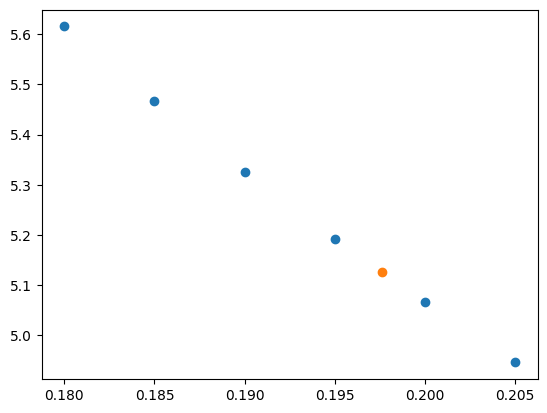

In [68]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(X, f)
plt.show()

# Задание 2.1 (б)
$h = \Delta x = 0,005$

In [69]:
h = 0.005
x = np.arange(0.180, 0.210, 0.005)

Вычисляем $t$ и $(t-i)$

In [70]:
T = (X - x[0])/h
t = T - np.arange(0, 6, 1)
print(T, t)

3.520000000000001 [ 3.52  2.52  1.52  0.52 -0.48 -1.48]


Вычисляем $ \Pi_{n+1}(t) = t(t-1)\dots(t-n)$

In [71]:
P = np.prod(t)*(T - 6)
P

-12.352212927774719

Вычисляем $C_{i}$: $C_{i} = (-1)^{n-i}*i!(n-i)!$

In [72]:
import math
C = np.array([((-1) ** (6-i)) * math.factorial(i)*math.factorial(6-i) for i in range(6)])
C

array([ 720, -120,   48,  -36,   48, -120])

Вычисляем $(t_{i} - i)C_{i}, \frac{y_{i}}{((t_{i} - i)C_{i})}$

In [73]:
print(t*C)
print(y/(t*C))

[2534.4  -302.4    72.96  -18.72  -23.04  177.6 ]
[ 0.00221568 -0.01807847  0.07300356 -0.27740598 -0.21989974  0.02785017]


Вычисляем $\sum \frac{y_{i}}{((t_{i} - i)C_{i})}$

In [74]:
sm = np.sum(y/(t*C))
sm

-0.41231477801052213

Вычисляем $$f(x) \thickapprox \Pi_{6+1}(x) * \sum^{6}_{i=0}(\frac{y_{i}}{(t-i)C_{i}})$$

In [75]:
f = P*sm
f

5.092999931254135

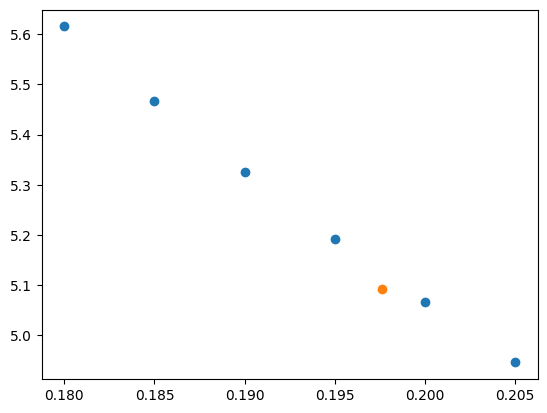

In [76]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(X, f)
plt.show()